In [2]:
# Load the Trained Model
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import os
import random

# Load the best saved model
model = load_model("custom_cnn_final.keras")

# Define class names
class_names = ['biological', 'cardboard', 'clothes', 'glass', 'metal', 
               'paper', 'plastic', 'shoes', 'trash', 'battery']

Found 30 images in subfolders


I0000 00:00:1751288610.061857    1082 service.cc:145] XLA service 0x7e04e80037e0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1751288610.061928    1082 service.cc:153]   StreamExecutor device (0): NVIDIA GeForce GTX 1660 Ti with Max-Q Design, Compute Capability 7.5
2025-06-30 14:03:30.087620: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2025-06-30 14:03:30.254265: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:465] Loaded cuDNN version 8907
I0000 00:00:1751288611.793198    1082 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


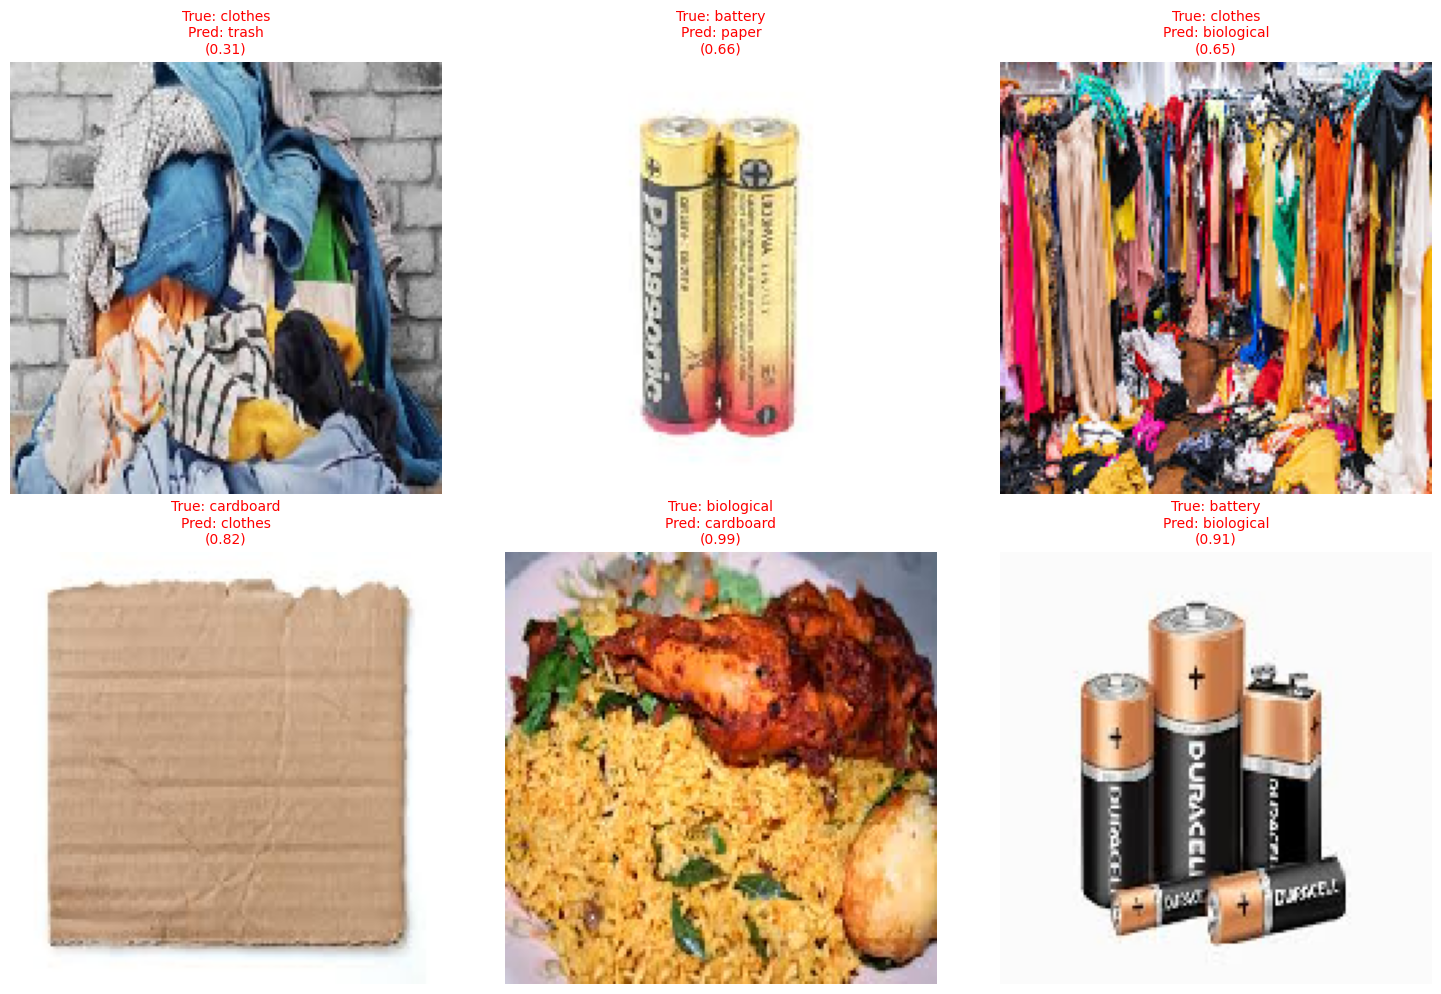

In [3]:
# Visualize Some Test Images with Predictions
test_folder_path = "test-dataset"

# Get all images from subfolders with their true labels
image_files = []
true_labels = []

for class_folder in os.listdir(test_folder_path):
    class_path = os.path.join(test_folder_path, class_folder)
    if os.path.isdir(class_path):
        for img_file in os.listdir(class_path):
            if img_file.lower().endswith(('.jpg', '.jpeg', '.png')):
                image_files.append(os.path.join(class_folder, img_file))
                true_labels.append(class_folder)  # True label is the folder name

print(f"Found {len(image_files)} images in subfolders")

# Select random images
indices = random.sample(range(len(image_files)), 6)
selected_images = [image_files[i] for i in indices]
selected_true_labels = [true_labels[i] for i in indices]

plt.figure(figsize=(15, 10))

for i in range(6):
    img_path = os.path.join(test_folder_path, selected_images[i])
    true_label = selected_true_labels[i]
    
    # Load and predict
    img = image.load_img(img_path, target_size=(160, 160))
    x = image.img_to_array(img)
    x = x / 255.0
    x = np.expand_dims(x, axis=0)
    
    pred = model.predict(x, verbose=0)
    predicted_class = class_names[np.argmax(pred)]
    confidence = np.max(pred)
    
    # Check if prediction is correct
    is_correct = predicted_class == true_label
    color = 'green' if is_correct else 'red'
    
    # Display
    plt.subplot(2, 3, i + 1)
    plt.imshow(img)
    plt.title(f"True: {true_label}\nPred: {predicted_class}\n({confidence:.2f})", 
              color=color, fontsize=10)
    plt.axis('off')

plt.tight_layout()
plt.show()